In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

In [3]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", genre="advice")
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full", categories="limited")
full_df = full_df[full_df["year"]<2020]

# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

categories = [
        # "ctscinet", # no defined genre
        "career_related_policy",
        "working_life",
        "career_profiles",
        # "life_and_career_balance",# no defined genre
        # "myscinet", # no defined genre
        # "issues_and_perspectives", # too much overlap with advice, no defined genre
        "advice"
        ]

print("done")

done


In [5]:
full_df.tail(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,career_related_policy,working_life,career_profiles,advice,author,n_posts_author,column1,column2,one_time
6110,382,why i stopped turning a blind eye to the ethics of my research—and personal life,"[working life, non-disciplinary]",eva kinnebrew,2019-12-12,2:00 pm,"bythis summer, i killed a bird while on a research trip. the project leader and i were sitting u...",[eva kinnebrew is a ph.d. student at the university of vermont in burlington.],8473,288,2019,no,yes,no,no,eva kinnebrew,1,no,no,yes
6111,384,three tips that made me a better teacher,"[working life, non-disciplinary]",firdous a. khan,2019-12-19,2:00 pm,"bywhile preparing to teach my first lecture as a new faculty member, i told myself: “you have ma...",[firdous a. khan is an associate professor at st. george’s university in grenada.],8480,288,2019,no,yes,no,no,firdous a. khan,1,no,no,yes


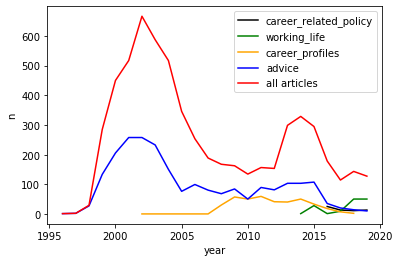

In [10]:
full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

colors = ["black","green","orange","blue","purple","yellow"]
dfs = []
count=0

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    dfs.append(cat_df)
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    # print(cat_vis.head())
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat,data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

# plt.savefig("../figs/article_types_expanded.png")
# sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/advice_section.png")

In [16]:
policy_df = dfs[0]
wl_df = dfs[1]
profile_df = dfs[2]
advice_df = dfs[3]

Text(0.5, 1.0, 'advice')

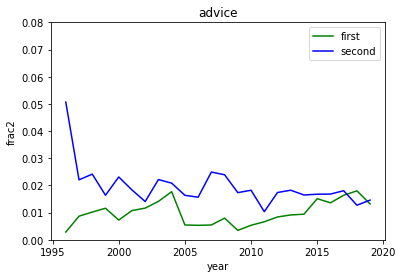

In [13]:
# just using the advice df only 

counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

advice_counts_plot_df = counts_df.groupby("year").mean()

advice_counts_plot_df = advice_counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_counts_plot_df)
plt.title("advice person proportions")
plt.ylim(0,0.08)
plt.title("advice")

# plt.savefig("../figs/person_advice.png")

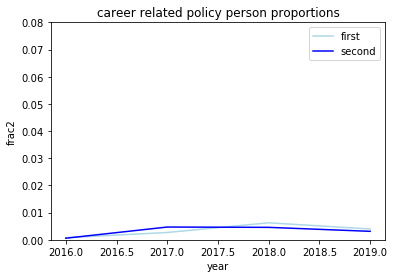

In [20]:
# just using the advice tagged articles in the full dataset

counts_df = clh.pronouns(policy_df)

# print(counts_df.sort_values(by="year").tail())
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

advice_tag_counts_plot_df = counts_df.groupby("year").mean()

advice_tag_plot_df = advice_tag_counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "lightblue", label="first", data=advice_tag_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_tag_plot_df)
plt.title("career related policy person proportions")
plt.ylim(0,0.08)

plt.savefig("../figs/person_policy.png")

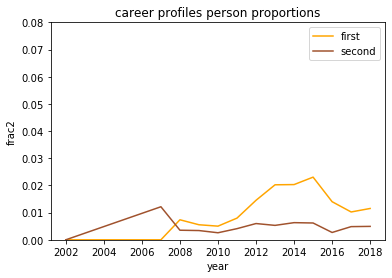

In [21]:
counts_df = clh.pronouns(profile_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

news_counts_plot_df = counts_df.groupby("year").mean()

news_counts_plot_df = news_counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "orange", label="first", data=news_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "sienna", label="second", data=news_counts_plot_df)
plt.title("career profiles person proportions")
plt.ylim(0,0.08)
# plt.title("News")

plt.savefig("../figs/person_profiles.png")


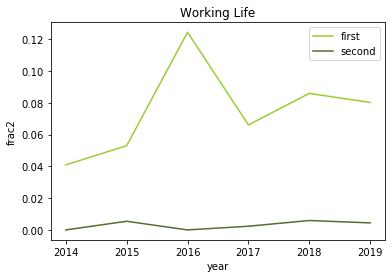

In [23]:
# just using the working life tag only 

counts_df = clh.pronouns(wl_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

wl_counts_plot_df = counts_df.groupby("year").mean()

wl_counts_plot_df = wl_counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "yellowgreen", label="first", data=wl_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "darkolivegreen", label="second", data=wl_counts_plot_df)
# plt.ylim(0,0.08)
plt.title("Working Life")

plt.savefig("../figs/person_WL.png")

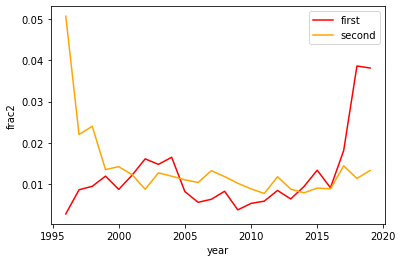

In [24]:
counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_plot_df = counts_plot_df.reset_index()
counts_plot_df = counts_plot_df.reset_index()
counts_df.head()

sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

plt.savefig("../figs/person_all.png")


In [19]:
counts_plot_df.head()

,year,id,first,second,wc,frac1,frac2
0,1996,0.500000,7.000000,90.000000,1813.500000,0.003342,0.050339
1,1997,40.333333,9.000000,22.333333,1078.000000,0.009095,0.021271
2,1998,134.166667,10.633333,29.400000,1351.233333,0.009906,0.023650
3,1999,677.417544,11.663158,11.126316,747.396491,0.011894,0.011942
4,2000,1059.584444,8.486667,12.151111,782.442222,0.008687,0.013195


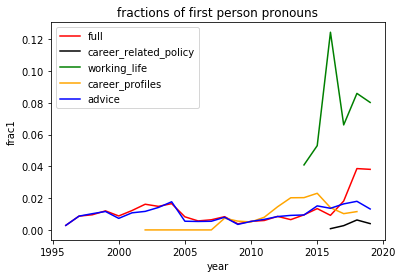

In [30]:
colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

sns.lineplot(x = "year", y = "frac1", color = "red", label="full", data=full_counts_plot_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
    
    counts_plot_df = counts_df.groupby("year").mean()
    counts_plot_df = counts_plot_df.reset_index()

    sns.lineplot(x = "year", y = "frac1", color = colors[count], legend="full", label=categories[count], data = counts_plot_df)
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.title("fractions of first person pronouns")

plt.savefig("../figs/person_first_all_category.png")

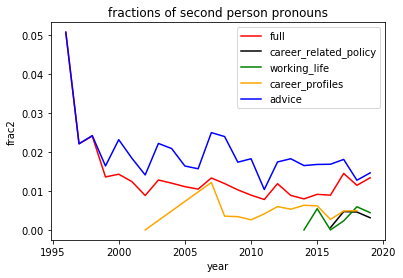

In [31]:
colors = ["black","green","orange","blue","purple","yellow"]
plots = []
count=0

sns.lineplot(x = "year", y = "frac2", color = "red", label="full", data=full_counts_plot_df)

for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.pronouns(df)
    counts_df["frac2"] = counts_df["second"]/counts_df["wc"]
    
    counts_plot_df = counts_df.groupby("year").mean()
    counts_plot_df = counts_plot_df.reset_index()

    sns.lineplot(x = "year", y = "frac2", color = colors[count], legend="full", label=categories[count], data = counts_plot_df)
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

plt.title("fractions of second person pronouns")

plt.savefig("../figs/person_second_all_category.png")

same thing but for columns

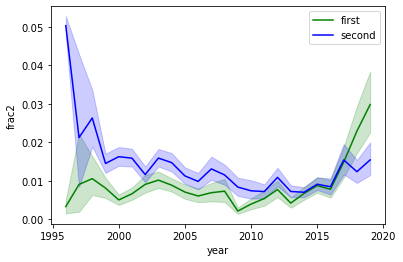

In [17]:
column_df = full_df[full_df.column2=="yes"]
not_column_df = full_df[full_df.column2=="no"]

counts1_df = clh.pronouns(column_df)
counts2_df = clh.pronouns(not_column_df)


counts1_df["frac1"] = counts1_df["first"]/counts1_df["wc"]
counts1_df["frac2"] = counts1_df["second"]/counts1_df["wc"]
counts2_df["frac1"] = counts2_df["first"]/counts2_df["wc"]
counts2_df["frac2"] = counts2_df["second"]/counts2_df["wc"]

counts1_plot_df = counts1_df.groupby("year").mean()
counts2_plot_df = counts2_df.groupby("year").mean()

counts1_plot_df = counts1_plot_df.reset_index()
counts2_plot_df = counts2_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts1_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts1_df)
# sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=counts2_df)
# sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=counts2_df)